In [245]:
import pandas as pd
# Loading Data in Pandas Data Frames
trainDF=pd.read_csv('../train.csv',index_col=0)
testDF=pd.read_csv('../test.csv',index_col=0)
# trainDF.location=trainDF.location.apply(lambda x: int(x.split(' ')[1]))
# testDF.location=testDF.location.apply(lambda x: int(x.split(' ')[1]))
# trainDF.describe()
trainDF.head()

,location,fault_severity
id,,
14121,location 118,1
9320,location 91,0
14394,location 152,1
8218,location 931,1
14804,location 120,0


In [246]:
#merge test and train
data=pd.concat([trainDF,testDF],axis=0)
data[data.fault_severity.isnull()].head()

,fault_severity,location
id,,
11066,NaN,location 481
18000,NaN,location 962
16964,NaN,location 491
4795,NaN,location 532
3392,NaN,location 600


In [247]:
data.shape

(18552, 2)

In [248]:
eventTypeDF=pd.read_csv('../event_type.csv',index_col=0)
logFeatureDF=pd.read_csv('../log_feature.csv',index_col=0)
resourceTypeDF=pd.read_csv('../resource_type.csv',index_col=0)
severityTypeDF=pd.read_csv('../severity_type.csv',index_col=0)

In [249]:
logFeatureDF.volume=logFeatureDF.volume.apply(lambda x: int(x))
logFeatureDF.head()

,log_feature,volume
id,,
6597,feature 68,6
8011,feature 68,7
2597,feature 68,1
5022,feature 172,2
5022,feature 56,1


In [250]:
eventTypeVect=pd.get_dummies(eventTypeDF).groupby(eventTypeDF.index).sum()
logFeatureVect=pd.get_dummies(logFeatureDF).groupby(logFeatureDF.index).sum()
resourceTypeVect=pd.get_dummies(resourceTypeDF).groupby(resourceTypeDF.index).sum()
severityTypeVect=pd.get_dummies(severityTypeDF).groupby(severityTypeDF.index).sum()

In [251]:
data=data.join(eventTypeVect).join(logFeatureVect).join(resourceTypeVect).join(severityTypeVect)

In [252]:
data.location=data.location.apply(lambda x: int(x.split(' ')[1]))

In [269]:
len(data.location.unique())

1126

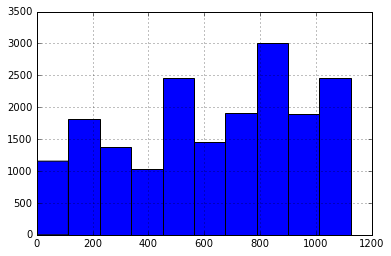

In [270]:
data.location.hist()

In [254]:
data[data.fault_severity.notnull()].volume.describe()

count    7381.000000
mean       31.820214
std        78.927572
min         1.000000
25%         3.000000
50%         8.000000
75%        25.000000
max      1649.000000
Name: volume, dtype: float64

In [255]:
testDF=data[data.fault_severity.isnull()]
trainDF=data[data.fault_severity.notnull()]

In [256]:
trainDF.head()

,fault_severity,location,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9,severity_type_severity_type 1,severity_type_severity_type 2,severity_type_severity_type 3,severity_type_severity_type 4,severity_type_severity_type 5
id,,,,,,,,,,,,,,,,,,,,,
14121,1,118,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9320,0,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14394,1,152,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8218,1,931,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
14804,0,120,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [257]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
# trainDF['volume']=trainDF.volume.apply(np.log)
# testDF['volume']=testDF.volume.apply(np.log)
# trainDF.volume.hist()


In [234]:
X=trainDF
X=X.drop(['volume','fault_severity'],axis=1)
X=X.as_matrix()
Y=trainDF.fault_severity
Y=Y.as_matrix()

In [235]:
X_test=testDF
X_test=X_test.drop(['volume','fault_severity'],axis=1)
X_test=X_test.as_matrix()

In [236]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier

In [237]:
clf = MultinomialNB()
# clf=DecisionTreeClassifier(criterion="entropy")
clf=RandomForestClassifier(n_estimators=10,criterion="gini")
print "training classifier ..."
clf.fit(X,Y)

training classifier ...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
print "performing cross fold validation ..."
predicted = cross_validation.cross_val_predict(clf, X, Y, cv=5)

performing cross fold validation ...


In [239]:
print "accuracy score: ", metrics.accuracy_score(Y, predicted)
print "precision score: ", metrics.precision_score(Y, predicted,average='weighted')
print "recall score: ", metrics.recall_score(Y, predicted,average='weighted')

accuracy score:  0.709524454681
precision score:  0.702232618957
recall score:  0.709524454681


In [240]:
print "classification_report: \n ", metrics.classification_report(Y, predicted)

classification_report: 
               precision    recall  f1-score   support

        0.0       0.81      0.84      0.83      4784
        1.0       0.51      0.46      0.48      1871
        2.0       0.46      0.47      0.47       726

avg / total       0.70      0.71      0.71      7381



In [241]:
print "confusion_matrix:\n ", metrics.confusion_matrix(Y,predicted)

confusion_matrix:
  [[4039  577  168]
 [ 780  855  236]
 [ 148  235  343]]


In [242]:
# X_test.shape
Y_test=clf.predict_proba(X_test)

In [243]:
# create submission
submission = pd.DataFrame(Y_test,columns=['predict_0','predict_1','predict_2'])
submission.head()
submission['id']=testDF.index.values
cols=submission.columns.tolist()
cols=cols[-1:] + cols[:-1]
submission=submission[cols]
submission.to_csv(open('submission.csv','wt'),index=False)

In [108]:
submission.head()

,id,predict_0,predict_1,predict_2
0,11066,0.897315,0.102685,0.000000
1,18000,0.434138,0.146182,0.419681
2,16964,1.000000,0.000000,0.000000
3,4795,0.800000,0.200000,0.000000
4,3392,0.211760,0.386742,0.401498


SyntaxError: invalid syntax (<ipython-input-143-d0f862b98f8e>, line 1)